# Python file for training FNO

In [1]:
import random
import torch
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from timeit import default_timer

sys.path.append('../')
from models import FNN1d, FNN_train
prefix = "/central/groups/esm/dzhuang/cost-accuracy-data/"


# Darcy equation solver
$$-\nabla (a \nabla u) = f$$

In [25]:
darcy_as = np.load(prefix+"darcy_a.npy")
darcy_us_ref = np.load(prefix+"darcy_u.npy")


In [4]:
torch.manual_seed(0)
np.random.seed(0)

downsample_ratio = 1

L, Ne_ref = 1.0, 2**12
Ne = Ne_ref//downsample_ratio

grid = np.linspace(0, L, Ne+1)

n_train = n_test = 2**14
x_train = torch.from_numpy(np.stack((darcy_as[0:n_train, 0::downsample_ratio], np.tile(grid, (n_train,1))), axis=-1).astype(np.float32))
y_train = torch.from_numpy(darcy_us_ref[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_train, y_train are [n_data, n_x, n_channel] arrays
x_test = torch.from_numpy(np.stack((darcy_as[-n_test:, 0::downsample_ratio], np.tile(grid, (n_test,1))), axis=-1).astype(np.float32))
y_test = torch.from_numpy(darcy_us_ref[-n_test:, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_test, y_test are [n_data, n_x, n_channel] arrays


n_fno_layers = 3
k_max = 32
d_f = 32
# fourier k_max
modes = [k_max] * n_fno_layers
# channel d_f
layers = [d_f] * (n_fno_layers + 1)
fc_dim = d_f
in_dim = 2
out_dim = 1
act = "gelu"
pad_ratio = 0.05

base_lr = 0.001
epochs = 11
milestones = [200, 300, 400, 500, 800,900]
scheduler_gamma = 0.5
batch_size=32
normalization = True
dim = []

config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim, "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
          "train" : {"base_lr": base_lr, "epochs": epochs, "milestones": milestones, "scheduler_gamma": scheduler_gamma, "batch_size": batch_size, 
                    "normalization": normalization, "dim": dim}}

start = default_timer()
train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN1d_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/darcy_FNO")
end = default_timer()
print("epochs = ", epochs, "elapsed time = ", end - start)

Epoch :  0  Rel. Train L2 Loss :  0.1476301160582807  Rel. Test L2 Loss :  0.03670573808631161  Test L2 Loss :  0.1326889921037946
Epoch :  10  Rel. Train L2 Loss :  0.01167851842546952  Rel. Test L2 Loss :  0.010566048879809387  Test L2 Loss :  0.03954440551751759
epochs =  11 elapsed time =  181.13013621466234


In [4]:
torch.manual_seed(0)
np.random.seed(0)

downsample_ratio = 1

L, Ne_ref = 1.0, 2**12
Ne = Ne_ref//downsample_ratio

grid = np.linspace(0, L, Ne+1)

n_train = n_test = 2**13
x_train = torch.from_numpy(np.stack((darcy_as[0:n_train, 0::downsample_ratio], np.tile(grid, (n_train,1))), axis=-1).astype(np.float32))
y_train = torch.from_numpy(darcy_us_ref[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_train, y_train are [n_data, n_x, n_channel] arrays
x_test = torch.from_numpy(np.stack((darcy_as[-n_test:, 0::downsample_ratio], np.tile(grid, (n_test,1))), axis=-1).astype(np.float32))
y_test = torch.from_numpy(darcy_us_ref[-n_test:, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_test, y_test are [n_data, n_x, n_channel] arrays


n_fno_layers = 6
k_max = 128
d_f = 128
# fourier k_max
modes = [k_max] * n_fno_layers
# channel d_f
layers = [d_f] * (n_fno_layers + 1)
fc_dim = d_f
in_dim = 2
out_dim = 1
act = "gelu"
pad_ratio = 0.05

base_lr = 0.001
epochs = 11
milestones = [200, 300, 400, 500, 800,900]
scheduler_gamma = 0.5

scheduler = "CosineAnnealingLR"
weight_decay = 0.0 #1e-4
batch_size=64


normalization_x = True
normalization_y = True
normalization_dim = []
config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim, "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
          "train" : {"base_lr": base_lr, "weight_decay": weight_decay, "epochs": epochs, "scheduler": scheduler, "milestones": milestones, "scheduler_gamma": scheduler_gamma, "batch_size": batch_size, 
                    "normalization_x": normalization_x,"normalization_y": normalization_y, "normalization_dim": normalization_dim}}

start = default_timer()
train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN1d_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/darcy_FNO")
end = default_timer()
print("epochs = ", epochs, "elapsed time = ", end - start)

NameError: name 'darcy_as' is not defined

In [ ]:
Ne_ref = 2**12
n_train = n_test = 2**14
n_fno_layers = 6
k_max = 128
d_f = 128
epochs =  11 elapsed time =  1022.8753047250211

Ne_ref = 2**12
n_train = n_test = 2**13
n_fno_layers = 6
k_max = 128
d_f = 128
epochs =  11 elapsed time =  509.5362855917774


Ne_ref = 2**12
n_train = n_test = 2**13
n_fno_layers = 3
k_max = 32
d_f = 32
epochs =  11 elapsed time =  88

Ne_ref = 2**12
n_train = n_test = 2**13
n_fno_layers = 3
k_max = 128
d_f = 128
epochs =  11 elapsed time =  281.1660668849945

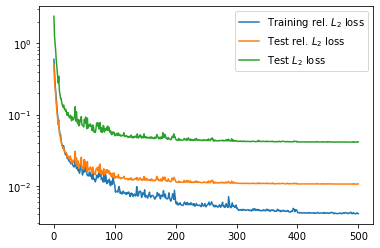

In [20]:
n = len(train_rel_l2_losses)
plt.plot(np.arange(n), train_rel_l2_losses, label=r"Training rel. $L_2$ loss")
plt.plot(np.arange(n), test_rel_l2_losses, label=r"Test rel. $L_2$ loss")
plt.semilogy(np.arange(n), test_l2_losses, label=r"Test $L_2$ loss")
plt.legend()

# Heat equation
$$
u_t - \triangle u = f
$$

In [2]:
heat_u0s    = np.load(prefix+"heat_u0.npy")
heat_fs     = np.load(prefix+"heat_f.npy")
heat_us_ref = np.load(prefix+"heat_u.npy")


In [ ]:
torch.manual_seed(0)
np.random.seed(0)


downsample_ratio = 1

L, Ne_ref = 1.0, 2**12
Ne = Ne_ref//downsample_ratio

grid = np.linspace(0, L, Ne+1)

n_train = n_test = 2**10
x_train = torch.from_numpy(np.stack((heat_u0s[0:n_train, 0::downsample_ratio], heat_fs[0:n_train, 0::downsample_ratio], np.tile(grid, (n_train,1))), axis=-1).astype(np.float32))
y_train = torch.from_numpy(heat_us_ref[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_train, y_train are [n_data, n_x, n_channel] arrays
x_test = torch.from_numpy(np.stack((heat_u0s[-n_test:, 0::downsample_ratio], heat_fs[-n_test:, 0::downsample_ratio], np.tile(grid, (n_test,1))), axis=-1).astype(np.float32))
y_test = torch.from_numpy(heat_us_ref[-n_test:, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_test, y_test are [n_data, n_x, n_channel] arrays


n_fno_layers = 3
k_max = 128
d_f = 128
# fourier k_max
modes = [k_max] * n_fno_layers
# channel d_f
layers = [d_f] * (n_fno_layers + 1)
fc_dim = d_f
in_dim = 3
out_dim = 1
act = "gelu"
pad_ratio = 0.05
epochs = 1000
base_lr = 0.001


milestones = [200, 300, 400, 500, 800,900]
scheduler_gamma = 0.5

scheduler = "MultiStepLR"
weight_decay = 1.0e-4
# batch_size=32


# scheduler = "CosineAnnealingLR"
# weight_decay = 1.0e-4
batch_size=64



normalization_x = True
normalization_y = True
normalization_dim = []
config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim, "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
          "train" : {"base_lr": base_lr, "weight_decay": weight_decay, "epochs": epochs, "scheduler": scheduler, "milestones": milestones, "scheduler_gamma": scheduler_gamma, "batch_size": batch_size, 
                    "normalization_x": normalization_x,"normalization_y": normalization_y, "normalization_dim": normalization_dim}}


train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/test")

Epoch :  0  Rel. Train L2 Loss :  0.9344863258302212  Rel. Test L2 Loss :  0.7855793721973896  Test L2 Loss :  0.028890698100440204
Epoch :  10  Rel. Train L2 Loss :  0.09361651074141264  Rel. Test L2 Loss :  0.08943741908296943  Test L2 Loss :  0.001969613556866534
Epoch :  20  Rel. Train L2 Loss :  0.08165661478415132  Rel. Test L2 Loss :  0.0823770328424871  Test L2 Loss :  0.0015203638758976012
Epoch :  30  Rel. Train L2 Loss :  0.06245939061045647  Rel. Test L2 Loss :  0.12131970608606935  Test L2 Loss :  0.0020167314942227677
Epoch :  40  Rel. Train L2 Loss :  0.04470107262022793  Rel. Test L2 Loss :  0.04659771826118231  Test L2 Loss :  0.0013809645533910953
Epoch :  50  Rel. Train L2 Loss :  0.0753657768946141  Rel. Test L2 Loss :  0.06124902470037341  Test L2 Loss :  0.0011806074071500916
Epoch :  60  Rel. Train L2 Loss :  0.06861093826591969  Rel. Test L2 Loss :  0.06116172973997891  Test L2 Loss :  0.0016674501457600854
Epoch :  70  Rel. Train L2 Loss :  0.048115218174643815

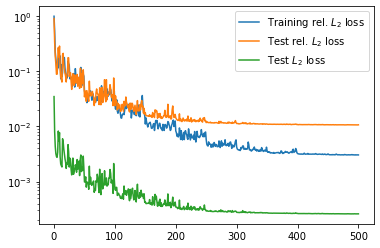

In [34]:
n = len(train_rel_l2_losses)
plt.plot(np.arange(n), train_rel_l2_losses, label=r"Training rel. $L_2$ loss")
plt.plot(np.arange(n), test_rel_l2_losses, label=r"Test rel. $L_2$ loss")
plt.semilogy(np.arange(n), test_l2_losses, label=r"Test $L_2$ loss")
plt.legend()

# PCA Linear regression

In [52]:
def PCA_preprocess(data, n):
    n = min(n, min(data.shape))
    U,S,V = np.linalg.svd(data, full_matrices=False)
    # return compressed data[:, n], basis[n, :]
    return U[:,0:n]*S[0:n], V[0:n, :]

def PCA_learn(heat_u0s, heat_fs, heat_us_ref, n_bases = 128, n_train = 2**10, downsample_ratio=1):
    # downsample_ratio = 1
    L, Ne_ref = 1.0, 2**12
    Ne = Ne_ref//downsample_ratio

    grid = np.linspace(0, L, Ne+1)

    # n_train = n_test = 2**10
    # n_bases = 128
    n_test = n_train 
    x_train_u0s = heat_u0s[0:n_train, 0::downsample_ratio]
    x_train_fs  = heat_fs[0:n_train, 0::downsample_ratio]
    y_train_us  = heat_us_ref[0:n_train, 0::downsample_ratio]

    x_test_u0s  = heat_u0s[-n_test:, 0::downsample_ratio]
    x_test_fs  = heat_fs[-n_test:, 0::downsample_ratio]
    y_test_us   = heat_us_ref[-n_test:, 0::downsample_ratio]

    x_train_u0s_cdata, x_train_u0s_basis = PCA_preprocess(x_train_u0s, n_bases)
    x_train_fs_cdata,  x_train_fs_basis  = PCA_preprocess(x_train_fs,  n_bases)
    y_train_us_cdata,  y_train_us_basis  = PCA_preprocess(y_train_us,  n_bases)
    x_train = np.hstack((x_train_u0s_cdata, x_train_fs_cdata, np.ones((n_train,1))))
    y_train = y_train_us_cdata


    lstsq_sol, residuals, _, _= np.linalg.lstsq(x_train, y_train)
    # np.dot(x_train, lstsq_sol) - y_train

    x_test_u0s_cdata = np.dot(x_test_u0s, x_train_u0s_basis.transpose())
    x_test_fs_cdata = np.dot(x_test_fs, x_train_fs_basis.transpose() )
    x_test = np.hstack((x_test_u0s_cdata, x_test_fs_cdata, np.ones((n_test,1))))
    y_test_us_pred   = np.dot(np.dot(x_test, lstsq_sol), y_train_us_basis)

    test_l2_loss = np.mean(np.linalg.norm(y_test_us_pred - y_test_us, axis=1)/np.sqrt(Ne)) 
    test_rel_l2_loss  = np.mean(np.linalg.norm(y_test_us_pred - y_test_us, axis=1)/np.linalg.norm(y_test_us, axis=1) ) 

    return test_l2_loss, test_rel_l2_loss




In [5]:
n_data_array = np.array([256, 512, 1024, 2048, 4096, 8192])
n_bases_array = np.array([32, 64, 128, 256])
downsample_ratio_array = np.array([1, 2, 4, 8])

test_l2_losses, test_rel_l2_losses = np.zeros((len(n_data_array), len(n_bases_array), len(downsample_ratio_array))), np.zeros((len(n_data_array), len(n_bases_array), len(downsample_ratio_array)))



In [ ]:
for i, n_data in enumerate(n_data_array):
    for j, n_bases in enumerate(n_bases_array):
        for k, downsample_ratio in enumerate(downsample_ratio_array):
            test_l2_losses[i,j,k], test_rel_l2_losses[i,j,k] = PCA_learn(heat_u0s, heat_fs, heat_us_ref, n_bases = n_bases, n_train = n_data, downsample_ratio=downsample_ratio)

        
np.save("heat_PCA_test_l2_losses.npy", test_l2_losses)
np.save("heat_PCA_test_rel_l2_losses.npy", test_rel_l2_losses)

In [6]:
test_l2_losses = np.load("heat_PCA_test_l2_losses.npy")
test_rel_l2_losses = np.load("heat_PCA_test_rel_l2_losses.npy")

Text(0, 0.5, 'Training data size')

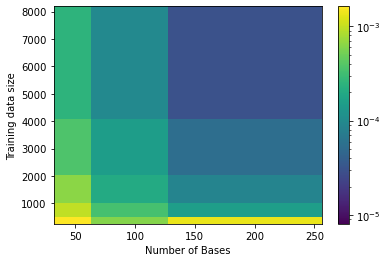

In [7]:
import matplotlib.colors as colors
Z = test_rel_l2_losses[:,:,0]
plt.pcolormesh(n_bases_array, n_data_array, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()
plt.xlabel("Number of Bases")
plt.ylabel("Training data size")

Text(0, 0.5, 'Rel. L₂ error')

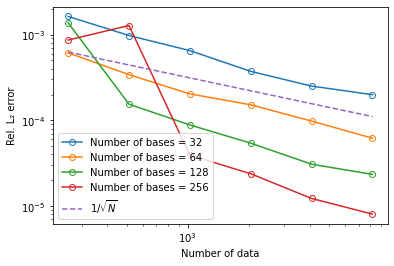

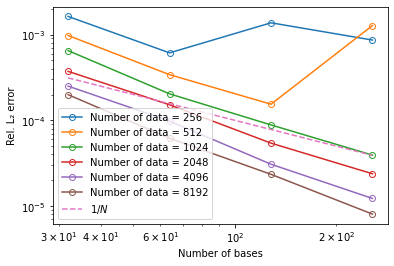

In [8]:

plt.figure()
for j, n_bases in enumerate(n_bases_array):
    plt.loglog(n_data_array, Z[:, j], "-o", fillstyle="none", label="Number of bases = "+str(n_bases))

plt.loglog(n_data_array, 0.01/np.sqrt(n_data_array), "--", label=r"$1/\sqrt{N}$")
plt.legend()
plt.xlabel("Number of data")
plt.ylabel("Rel. L₂ error")


plt.figure()
for i, n_data in enumerate(n_data_array):
    plt.loglog(n_bases_array, Z[i, :], "-o", fillstyle="none", label="Number of data = "+str(n_data))

plt.loglog(n_bases_array, 0.01/n_bases_array**1.0, "--", label=r"$1/N$")
plt.legend()
plt.xlabel("Number of bases")
plt.ylabel("Rel. L₂ error")

# Burgers' equation

In [2]:
N_chunk = 16

chunk_size, Np = np.load(prefix+"burgers_us_1.npy").shape
print("chunk_size, Np = ", chunk_size, Np)
Ne = Np - 1
burgers_input = np.zeros((chunk_size*N_chunk, Ne+1))
burgers_output = np.zeros((chunk_size*N_chunk, Ne+1))

for i in range(N_chunk):
    burgers_input[chunk_size*i:chunk_size*(i+1), :] = np.load(prefix+"burgers_u0s_"+str(i+1)+".npy")
    burgers_output[chunk_size*i:chunk_size*(i+1), :] = np.load(prefix+"burgers_us_"+str(i+1)+".npy")



chunk_size, Np =  2048 4097


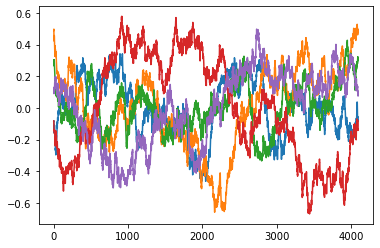

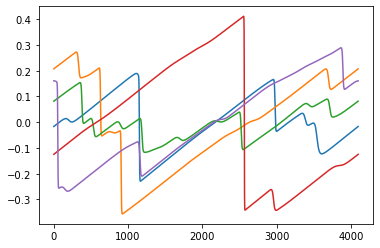

In [3]:
plt.figure()
plt.plot(burgers_input[20:25,:].T)

plt.figure()
plt.plot(burgers_output[20:25,:].T)

In [4]:
burgers_input[5,:]

array([0.07255316, 0.06758073, 0.04051964, ..., 0.12278369, 0.11001161,
       0.07255316])

In [6]:
downsample_ratio = 1

L, Ne_ref = 1.0, 2**12
Ne = Ne_ref//downsample_ratio

# grid = np.sin(np.pi/L*np.linspace(0, L, Ne+1))
grid = np.ones(Ne+1)

pad_ratio = 0.0

# grid = np.linspace(0, L, Ne+1)
# pad_ratio = 0.05


n_train = 1024
n_test = 2048

x_train = torch.from_numpy(np.stack((burgers_input[0:n_train, 0::downsample_ratio], np.tile(grid, (n_train,1))), axis=-1).astype(np.float32))
x_test = torch.from_numpy(np.stack((burgers_input[-n_test:, 0::downsample_ratio], np.tile(grid, (n_test,1))), axis=-1).astype(np.float32))

    
y_train = torch.from_numpy(burgers_output[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_train, y_train are [n_data, n_x, n_channel] arrays
y_test = torch.from_numpy(burgers_output[-n_test:, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_test, y_test are [n_data, n_x, n_channel] arrays

n_fno_layers = 4
k_max = 16
d_f = 64
# fourier k_max
modes = [k_max] * n_fno_layers
# channel d_f
layers = [d_f] * (n_fno_layers + 1)
fc_dim = d_f
in_dim = 2
out_dim = 1
act = "gelu"


base_lr = 0.001
epochs = 1000
# scheduler = "CosineAnnealingLR"
weight_decay = 1e-4


scheduler = "MultiStepLR"
# weight_decay = 0

milestones = [200, 300, 400, 500, 800,900]
scheduler_gamma = 0.5
batch_size=64
normalization_x = True
normalization_y = True
normalization_dim = []


config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim, "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
          "train" : {"base_lr": base_lr, "weight_decay": weight_decay, "epochs": epochs, "scheduler": scheduler, "milestones": milestones, "scheduler_gamma": scheduler_gamma, "batch_size": batch_size, 
                    "normalization_x": normalization_x,"normalization_y": normalization_y, "normalization_dim": normalization_dim}}


train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/test")

Epoch :  0  Rel. Train L2 Loss :  0.9202091172337532  Rel. Test L2 Loss :  0.7438523657619953  Test L2 Loss :  0.11685613612644374
Epoch :  10  Rel. Train L2 Loss :  0.23599516041576862  Rel. Test L2 Loss :  0.2416438809596002  Test L2 Loss :  0.036530289333313704
Epoch :  20  Rel. Train L2 Loss :  0.17040311358869076  Rel. Test L2 Loss :  0.19296466652303934  Test L2 Loss :  0.02913476328831166
Epoch :  30  Rel. Train L2 Loss :  0.1386922551319003  Rel. Test L2 Loss :  0.17445519845932722  Test L2 Loss :  0.026393562322482467
Epoch :  40  Rel. Train L2 Loss :  0.11896671168506145  Rel. Test L2 Loss :  0.16299268323928118  Test L2 Loss :  0.02465474436758086
Epoch :  50  Rel. Train L2 Loss :  0.11874390812590718  Rel. Test L2 Loss :  0.15668781101703644  Test L2 Loss :  0.023684892046730965
Epoch :  60  Rel. Train L2 Loss :  0.09271675487980247  Rel. Test L2 Loss :  0.15662984549999237  Test L2 Loss :  0.023761834192555398
Epoch :  70  Rel. Train L2 Loss :  0.08692914620041847  Rel. Te

KeyboardInterrupt: 

# No grid input

In [ ]:
downsample_ratio = 1

L, Ne_ref = 1.0, 2**12
Ne = Ne_ref//downsample_ratio

grid = np.linspace(0, L, Ne+1)

pad_ratio = 0.0

# grid = np.linspace(0, L, Ne+1)
# pad_ratio = 0.05


n_train = 1024*8
n_test = 2048

x_train = torch.from_numpy(burgers_input[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
x_test = torch.from_numpy(burgers_input[-n_test:, 0::downsample_ratio, np.newaxis].astype(np.float32))

    
y_train = torch.from_numpy(burgers_output[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_train, y_train are [n_data, n_x, n_channel] arrays
y_test = torch.from_numpy(burgers_output[-n_test:, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_test, y_test are [n_data, n_x, n_channel] arrays

n_fno_layers = 4
k_max = 16
d_f = 64
# fourier k_max
modes = [k_max] * n_fno_layers
# channel d_f
layers = [d_f] * (n_fno_layers + 1)
fc_dim = d_f
in_dim = 1
out_dim = 1
act = "gelu"


base_lr = 0.001
epochs = 1000
# scheduler = "CosineAnnealingLR"
weight_decay = 1e-4


scheduler = "MultiStepLR"
# weight_decay = 0

milestones = [200, 300, 400, 500, 800,900]
scheduler_gamma = 0.5
batch_size=64
normalization_x = True
normalization_y = True
normalization_dim = []


config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim, "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
          "train" : {"base_lr": base_lr, "weight_decay": weight_decay, "epochs": epochs, "scheduler": scheduler, "milestones": milestones, "scheduler_gamma": scheduler_gamma, "batch_size": batch_size, 
                    "normalization_x": normalization_x,"normalization_y": normalization_y, "normalization_dim": normalization_dim}}


train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/test")

Epoch :  0  Rel. Train L2 Loss :  0.40155763959046453  Rel. Test L2 Loss :  0.24694961495697498  Test L2 Loss :  0.037060189875774086
Epoch :  10  Rel. Train L2 Loss :  0.10210486355936155  Rel. Test L2 Loss :  0.12581158429384232  Test L2 Loss :  0.018930590653326362
Epoch :  20  Rel. Train L2 Loss :  0.07679172547068447  Rel. Test L2 Loss :  0.08684305544011295  Test L2 Loss :  0.013237168779596686
Epoch :  30  Rel. Train L2 Loss :  0.07155824458459392  Rel. Test L2 Loss :  0.07763706054538488  Test L2 Loss :  0.011759250570321456
Epoch :  40  Rel. Train L2 Loss :  0.06780996080487967  Rel. Test L2 Loss :  0.07218136545270681  Test L2 Loss :  0.011136171815451235
Epoch :  50  Rel. Train L2 Loss :  0.06910817557945848  Rel. Test L2 Loss :  0.07388835237361491  Test L2 Loss :  0.01127645344240591
Epoch :  60  Rel. Train L2 Loss :  0.0584393639001064  Rel. Test L2 Loss :  0.07330421404913068  Test L2 Loss :  0.01106186438119039
Epoch :  70  Rel. Train L2 Loss :  0.06164008899941109  Rel

# Visualize Prediction

In [ ]:
from models import UnitGaussianNormalizer

def predict(test_id, x_train, x_test, y_train, y_test):
    
    model_prefix = "/central/groups/esm/dzhuang/cost-accuracy-data/models/"
    model_name = model_prefix+"burgers_FNO"
    dim = len(x_train.shape) - 2 # n_train, size, n_channel


    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    if normalization:
        x_normalizer = UnitGaussianNormalizer(x_train, dim=normalization_dim)
        x_train = x_normalizer.encode(x_train)
        x_test = x_normalizer.encode(x_test)
        x_normalizer.to(device)

        y_normalizer = UnitGaussianNormalizer(y_train, dim=normalization_dim)
        y_train = y_normalizer.encode(y_train)
        y_test = y_normalizer.encode(y_test)
        y_normalizer.to(device)


    model = torch.load(model_name, map_location=device)


    # x, y = x_train[test_id:test_id+1].to(device), y_train[test_id:test_id+1].to(device)
    x, y = x_test[test_id:test_id+1].to(device), y_test[test_id:test_id+1].to(device)
    
    print(x.shape)
    out = model(x) #.reshape(batch_size_,  -1)

    if normalization:
        x = x_normalizer.decode(x)
        out = y_normalizer.decode(out)
        y = y_normalizer.decode(y)

    x = np.squeeze(x.detach().cpu().numpy())[:,0]
    out = np.squeeze(out.detach().cpu().numpy())
    y = np.squeeze(y.detach().cpu().numpy())
    
    return x, y, out

test_id = 343
x, y, out = predict(test_id, x_train, x_test, y_train, y_test)

test_id = 121
x_, y_, out_ = predict(test_id, x_train, x_test, y_train, y_test)


plt.figure()
plt.plot(grid, x, "--")
plt.plot(grid, x_, "--")
plt.xlabel("X")
plt.title("Input")


plt.figure()
plt.plot(grid, y, label="Reference")
plt.plot(grid, out, label="Prediction")
plt.xlabel("X")
plt.legend()
plt.title("Output 1")


plt.figure()
plt.plot(grid, y,  "--", label="Reference 1")
plt.plot(grid, y_, "--", label="Reference 2")
plt.xlabel("X")
plt.legend()
plt.title("Output")


plt.figure()
plt.plot(grid, out,  "--", label="Prediction 1")
plt.plot(grid, out_, "--", label="Prediction 2")
plt.xlabel("X")
plt.legend()
plt.title("Output")

print("Rel. Error = ", np.linalg.norm(out - y)/np.linalg.norm(y))

# Kuramoto–Sivashinsky Equation

In [9]:
N_chunk = 16

chunk_size, Ne = np.load(prefix+"KS_fs_1.npy").shape

KS_input = np.zeros((chunk_size*N_chunk, Ne+1))
KS_output = np.zeros((chunk_size*N_chunk, Ne+1))

for i in range(N_chunk):
    KS_input[chunk_size*i:chunk_size*(i+1), 0:Ne] = np.load(prefix+"KS_fs_"+str(i+1)+".npy")
    KS_output[chunk_size*i:chunk_size*(i+1), 0:Ne] = np.load(prefix+"KS_auto_correlation_"+str(i+1)+".npy")

KS_input[:, Ne] = KS_input[:, 0]
KS_output[:, Ne] = KS_output[:, 0]

print(KS_output.shape)

(32768, 2049)


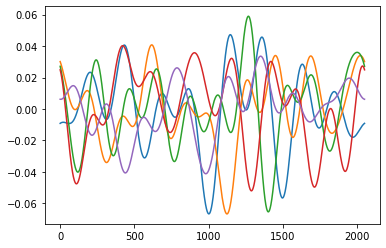

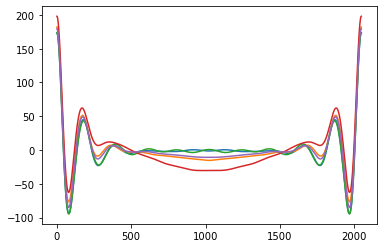

In [10]:
plt.figure()
plt.plot(KS_input[20:25,:].T)

plt.figure()
plt.plot(KS_output[20:25,:].T)

In [21]:
downsample_ratio = 1

L, Ne_ref = 100.0, 2**11
Ne = Ne_ref//downsample_ratio

grid = np.linspace(0, L, Ne+1)
pad_ratio = 0.05

# grid = np.sin(2*np.pi/L*np.linspace(0, L, Ne+1)) + 1
# pad_ratio = 0.0


n_train = 1024
n_test = 2048

x_train = torch.from_numpy(np.stack((KS_input[0:n_train, 0::downsample_ratio], np.tile(grid, (n_train,1))), axis=-1).astype(np.float32))
x_test = torch.from_numpy(np.stack((KS_input[-n_test:, 0::downsample_ratio], np.tile(grid, (n_test,1))), axis=-1).astype(np.float32))

    
y_train = torch.from_numpy(KS_output[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_train, y_train are [n_data, n_x, n_channel] arrays
y_test = torch.from_numpy(KS_output[-n_test:, 0::downsample_ratio, np.newaxis].astype(np.float32))
# x_test, y_test are [n_data, n_x, n_channel] arrays

n_fno_layers = 4
k_max = 16
d_f = 64
# fourier k_max
modes = [k_max] * n_fno_layers
# channel d_f
layers = [d_f] * (n_fno_layers + 1)
fc_dim = d_f
in_dim = 2
out_dim = 1
act = "gelu"

base_lr = 0.001
epochs = 1000
# scheduler = "CosineAnnealingLR"
weight_decay = 1e-4


scheduler = "MultiStepLR"
# weight_decay = 0

milestones = [200, 300, 400, 500, 800,900]
scheduler_gamma = 0.5
batch_size=64
normalization_x = True
normalization_y = True
normalization_dim = [0]


config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim, "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
          "train" : {"base_lr": base_lr, "weight_decay": weight_decay, "epochs": epochs, "scheduler": scheduler, "milestones": milestones, "scheduler_gamma": scheduler_gamma, "batch_size": batch_size, 
                    "normalization_x": normalization_x,"normalization_y": normalization_y, "normalization_dim": normalization_dim}}

In [22]:
torch.manual_seed(0)
np.random.seed(0)


start = default_timer()
train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/KS_FNO")
end = default_timer()
print("epochs = ", epochs, "elapsed time = ", end - start)

Epoch :  0  Rel. Train L2 Loss :  0.2512058215215802  Rel. Test L2 Loss :  0.2526704939082265  Test L2 Loss :  9.902723401784897
Epoch :  10  Rel. Train L2 Loss :  0.1257701115682721  Rel. Test L2 Loss :  0.129727051127702  Test L2 Loss :  5.375735491514206
Epoch :  20  Rel. Train L2 Loss :  0.1091692135669291  Rel. Test L2 Loss :  0.11952125909738243  Test L2 Loss :  4.946863666176796
Epoch :  30  Rel. Train L2 Loss :  0.09045774443075061  Rel. Test L2 Loss :  0.11826558271422982  Test L2 Loss :  4.883292578160763
Epoch :  40  Rel. Train L2 Loss :  0.07623784244060516  Rel. Test L2 Loss :  0.11963812238536775  Test L2 Loss :  4.910073325037956
Epoch :  50  Rel. Train L2 Loss :  0.06711302069015801  Rel. Test L2 Loss :  0.12605032860301435  Test L2 Loss :  5.138736322522163
Epoch :  60  Rel. Train L2 Loss :  0.05930677428841591  Rel. Test L2 Loss :  0.1295055546797812  Test L2 Loss :  5.250903353095055
Epoch :  70  Rel. Train L2 Loss :  0.05422223103232682  Rel. Test L2 Loss :  0.13572

KeyboardInterrupt: 

In [ ]:
Rel. Test L2 Loss :  0.12273216247558594
Epoch :  499  Rel. Train L2 Loss :  0.011101329833269119  Rel. Test L2 Loss :  0.0823355030734092  Test L2 Loss :  3.4052610844373703

# Visualize Prediction

torch.Size([1, 2049, 2])
torch.Size([1, 2049, 2])
Rel. Error =  0.019834137


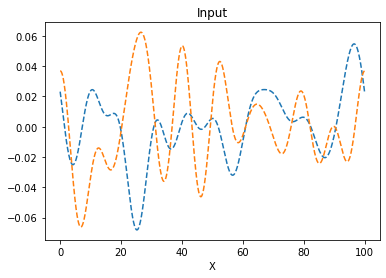

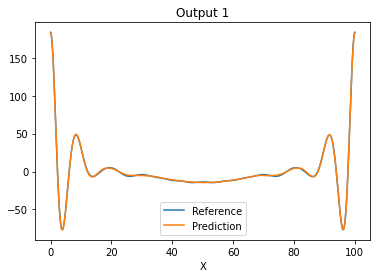

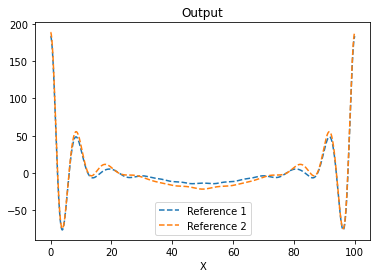

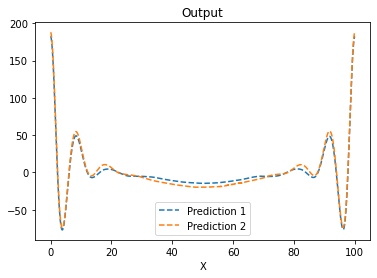

In [33]:
from models import UnitGaussianNormalizer

def predict(test_id, x_train, x_test, y_train, y_test):
    
    model_prefix = "/central/groups/esm/dzhuang/cost-accuracy-data/models/"
    model_name = model_prefix+"KS_FNO"
    dim = len(x_train.shape) - 2 # n_train, size, n_channel


    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    if normalization:
        x_normalizer = UnitGaussianNormalizer(x_train, dim=normalization_dim)
        x_train = x_normalizer.encode(x_train)
        x_test = x_normalizer.encode(x_test)
        x_normalizer.to(device)

        y_normalizer = UnitGaussianNormalizer(y_train, dim=normalization_dim)
        y_train = y_normalizer.encode(y_train)
        y_test = y_normalizer.encode(y_test)
        y_normalizer.to(device)


    model = torch.load(model_name, map_location=device)


    # x, y = x_train[test_id:test_id+1].to(device), y_train[test_id:test_id+1].to(device)
    x, y = x_test[test_id:test_id+1].to(device), y_test[test_id:test_id+1].to(device)
    
    print(x.shape)
    out = model(x) #.reshape(batch_size_,  -1)

    if normalization:
        x = x_normalizer.decode(x)
        out = y_normalizer.decode(out)
        y = y_normalizer.decode(y)

    x = np.squeeze(x.detach().cpu().numpy())[:,0]
    out = np.squeeze(out.detach().cpu().numpy())
    y = np.squeeze(y.detach().cpu().numpy())
    
    return x, y, out

test_id = 343
x, y, out = predict(test_id, x_train, x_test, y_train, y_test)

test_id = 121
x_, y_, out_ = predict(test_id, x_train, x_test, y_train, y_test)


plt.figure()
plt.plot(grid, x, "--")
plt.plot(grid, x_, "--")
plt.xlabel("X")
plt.title("Input")


plt.figure()
plt.plot(grid, y, label="Reference")
plt.plot(grid, out, label="Prediction")
plt.xlabel("X")
plt.legend()
plt.title("Output 1")


plt.figure()
plt.plot(grid, y,  "--", label="Reference 1")
plt.plot(grid, y_, "--", label="Reference 2")
plt.xlabel("X")
plt.legend()
plt.title("Output")


plt.figure()
plt.plot(grid, out,  "--", label="Prediction 1")
plt.plot(grid, out_, "--", label="Prediction 2")
plt.xlabel("X")
plt.legend()
plt.title("Output")

print("Rel. Error = ", np.linalg.norm(out - y)/np.linalg.norm(y))

In [11]:
M

27

Text(0.5, 1.0, 'Input')

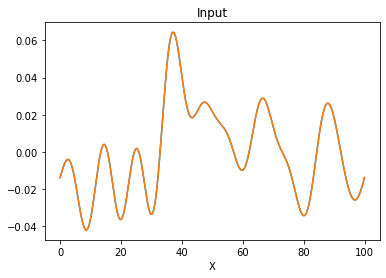

In [22]:
plt.figure()
plt.plot(grid, x_test[test_id, :, 0])
plt.plot(grid, x_test[test_id, :, 0])
plt.xlabel("X")
plt.title("Input")


In [46]:
a = torch.from_numpy(np.ones((3,4,5)))

In [51]:
torch.mean(a, [1]).shape

torch.Size([3, 5])

In [52]:
x_train.shape

torch.Size([2048, 1025, 2])

In [1]:
import random
import torch
import sys
import numpy as np
import math
torch.manual_seed(0)
np.random.seed(0)


sys.path.append('../')
from models import FNN1d, FNN_train

prefix = "/central/groups/esm/dzhuang/cost-accuracy-data/"

N_chunk = 16
chunk_size, Ne = np.load(prefix+"KS_fs_1.npy").shape
KS_input = np.zeros((chunk_size*N_chunk, Ne+1))
KS_output = np.zeros((chunk_size*N_chunk, Ne+1))

for i in range(N_chunk):
    KS_input[chunk_size*i:chunk_size*(i+1), 0:Ne] = np.load(prefix+"KS_fs_"+str(i+1)+".npy")
    KS_output[chunk_size*i:chunk_size*(i+1), 0:Ne] = np.load(prefix+"KS_auto_correlation_"+str(i+1)+".npy")

KS_input[:, Ne] = KS_input[:, 0]
KS_output[:, Ne] = KS_output[:, 0]

print(KS_output.shape)









n_data_array = [1024]
k_max_array = [32]
d_f_array = [32]
n_fno_layers_array = [4]
downsample_ratio_array = [1]

n_train_repeat = 1

#optimization
epochs = 1001
scheduler = "MultiStepLR"
weight_decay = 1e-4
base_lr = 0.001
milestones = [200, 300, 400, 500, 800,900]
scheduler_gamma = 0.5
batch_size=64
normalization_x = True
normalization_y = True
normalization_dim = [0]

data_analysis = np.zeros((len(n_data_array)*len(downsample_ratio_array)*len(n_fno_layers_array)*len(k_max_array)*len(d_f_array), 5+(3*epochs+1)*n_train_repeat)) 


L, Ne_ref = 100.0, 2**11
n_test = 2048
#training_rel_l2, test_rel_l2, test_l2, cost
i_data_analysis = 0
for n_data in n_data_array:
    for downsample_ratio in downsample_ratio_array:
        for n_fno_layers in n_fno_layers_array:
            for k_max in k_max_array:
                for d_f in d_f_array:  
                    setup_info="n_data_"+str(n_data)+"_k_max_"+str(k_max)+"_downsample_ratio_"+str(downsample_ratio)+"_n_fno_layers_"+str(n_fno_layers)+"_d_f_"+str(d_f)
                    
                    for i_train_repeat in range(n_train_repeat):

                        
                        Ne = Ne_ref//downsample_ratio

                        grid = np.linspace(0, L, Ne+1)
         
                        n_train = n_data
                         
                        x_train = torch.from_numpy(np.stack((KS_input[0:n_train, 0::downsample_ratio], np.tile(grid, (n_train,1))), axis=-1).astype(np.float32))
                        y_train = torch.from_numpy(KS_output[0:n_train, 0::downsample_ratio, np.newaxis].astype(np.float32))
                        # x_train, y_train are [n_data, n_x, n_channel] arrays
                        x_test = torch.from_numpy(np.stack((KS_input[-n_test:, 0::downsample_ratio], np.tile(grid, (n_test,1))), axis=-1).astype(np.float32))
                        y_test = torch.from_numpy(KS_output[-n_test:, 0::downsample_ratio, np.newaxis].astype(np.float32))
                        # x_test, y_test are [n_data, n_x, n_channel] arrays



                        # fourier k_max
                        modes = [k_max] * n_fno_layers
                        # channel d_f
                        layers = [d_f] * (n_fno_layers + 1)
                        fc_dim = d_f
                        in_dim = 2
                        out_dim = 1
                        act = "gelu"
                        pad_ratio = 0.05

                        

                        config = {"model" : {"modes": modes, "fc_dim": fc_dim, "layers": layers, "in_dim": in_dim,
                                             "out_dim":out_dim, "act": act, "pad_ratio":pad_ratio},
                                  "train" : {"base_lr": base_lr, "weight_decay": weight_decay, "epochs": epochs,
                                             "scheduler": scheduler, "milestones": milestones, 
                                             "scheduler_gamma":scheduler_gamma, "batch_size": batch_size,
                                             "normalization_x": normalization_x,"normalization_y": normalization_y,
                                             "normalization_dim": normalization_dim}}

                        train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost = FNN_train(x_train, y_train, x_test, y_test, config, save_model_name=prefix+"models/KS_FNO_"+str(i_train_repeat)+"_"+setup_info)
                        
                        data_analysis[i_data_analysis,5+i_train_repeat*(3*epochs+1):5+(i_train_repeat+1)*(3*epochs+1)] = np.hstack((train_rel_l2_losses, test_rel_l2_losses, test_l2_losses, cost))
                    
                    data_analysis[i_data_analysis,0:5] = n_data, downsample_ratio, n_fno_layers, k_max, d_f
                    i_data_analysis += 1
                    

np.save(prefix+"data/KS_analysis_"+setup_info+".npy", data_analysis)



(32768, 2049)
Epoch :  0  Rel. Train L2 Loss :  0.25460418593138456  Rel. Test L2 Loss :  0.2546784644946456  Test L2 Loss :  9.962577104568481
Epoch :  10  Rel. Train L2 Loss :  0.21638071071356535  Rel. Test L2 Loss :  0.2301151854917407  Test L2 Loss :  9.326777637004852
Epoch :  20  Rel. Train L2 Loss :  0.11930576711893082  Rel. Test L2 Loss :  0.12381643359549344  Test L2 Loss :  5.14733449369669
Epoch :  30  Rel. Train L2 Loss :  0.1039921147748828  Rel. Test L2 Loss :  0.116144914412871  Test L2 Loss :  4.849277146160603
Epoch :  40  Rel. Train L2 Loss :  0.09522595955058932  Rel. Test L2 Loss :  0.11435962677933276  Test L2 Loss :  4.756322264671326
Epoch :  50  Rel. Train L2 Loss :  0.08493923605419695  Rel. Test L2 Loss :  0.11480522458441556  Test L2 Loss :  4.762247189879417


KeyboardInterrupt: 